# Clinical Questionnaire Only
This notebook is restricted to only those analyses with clinical questionairre data.

- [Our Cohort (n=25)](#main_cohort)

In [10]:
%matplotlib inline
import pandas as pd
import json

main_cohort = pd.read_csv('./data/01_filtered_combined.csv') 
main_cohort_c = main_cohort[main_cohort['trt']=='control']
main_cohort_i = main_cohort[main_cohort['trt']=='intervention']

<a id='main_cohort'></a>
## Main Cohort

- [Overall Score](#overall)
- [Teir 1](#tier1)
- [Teir 2](#tier2)
- [Teir 3](#teir3)
- [Time to Complete](#time)

<a id='overall'></a>
### Overall Score

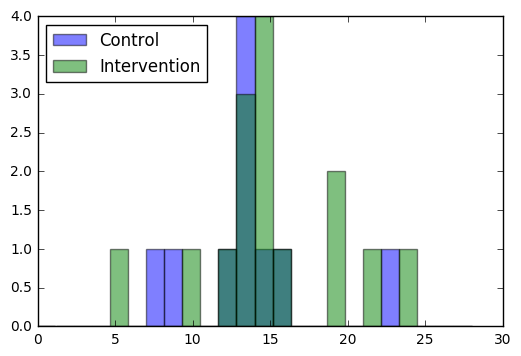

In [11]:
#Make a histogram
import random
import numpy
import scipy.stats
from matplotlib import pyplot

x = main_cohort_c['Score-sum']
y = main_cohort_i['Score-sum']

bins = numpy.linspace(0, 28, 25)

pyplot.hist(x, bins, alpha=0.5, label='Control')
pyplot.hist(y, bins, alpha=0.5, label='Intervention')
pyplot.legend(loc='upper left')
pyplot.show()

In [12]:
print("Control Mean score is", numpy.mean(x))
print("Intervention Mean score is", numpy.mean(y))

print("T Test results: ")
print(scipy.stats.ttest_ind(x,y))

Control Mean score is 13.5
Intervention Mean score is 15.0666666667
T Test results: 
Ttest_indResult(statistic=-0.85676489673402378, pvalue=0.40041382465838038)


> #### Results
The overal mean score is higher for the intervention group than the control group. However, because there are so few records, we do not have enough evidence to say anything with any level of certainty (p-value is > 0.05 and is 0.4).

<a id='teir1'></a>
### Teir 1 Questions
In order to tally up teir 1 questions, we need to know what is right/wrong. For this, we downloaded the survey and need to parse to identify correct answers.

In [15]:
meta = json.load(open('./data/KaiRx_Clinical_Questionnaire_-_Control.qsf','r'))
new = dict()
for i,x in enumerate(meta.get('SurveyElements')):
    payload = x.get('Payload')
    if isinstance(payload,dict):
        if any("GradingData" in s for s in list(payload.keys())):
            answers = payload.get('GradingData')
            text = []
            for z in answers:
                answer = z.get('ChoiceID')
                text.append(payload.get('Choices').get(answer).get('Display'))
            new[payload.get('QuestionDescription')] = text
            
            
#for each tiered question list, we explicitly label:
tier1 = ['4. You ask him about his diabetes medications and you can trust that he is telling you the truth...',
         '6. You realize that he has already taken the maximum dose of metformin for awhile without much ch...',
         '7. What was the starting dose of allopurinol prescribed for Mr. Smith? What was the last prescrib...',
         '8. Who prescribed his last refill of allopurinol? ',
         '3. You ask Mr. Smith about the details of his depression medication changes in the past but he ha...',
         'Task 1: Diabetes 1. Which medication(s) is the patient currently taking for diabetes?'
         ] 



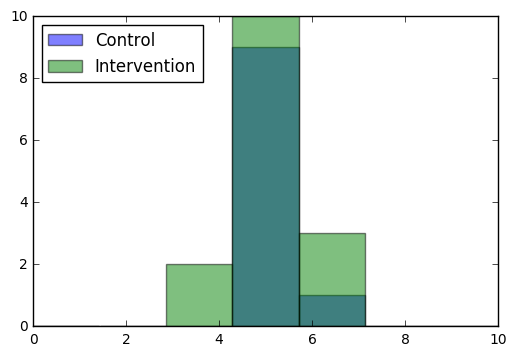

In [31]:
#We'll need a function to provide a participant score
def returnScore(row,qlist):
    score=0
    for x in qlist:
        if '...' in x:
            metax = x.split('...',1)[0]+'...'
        elif '2. Which drugs have been escalated in dose' in x:
            metax = '2. Which drugs have been escalated in dose at least twice?(Check all that apply.)'
        else:
            metax = x
        if (row[x] in new.get(metax)):
            score+=1
    return(score)

#and finally, we'll need to score each leg of the experiment
tier1_control = main_cohort_c.apply(lambda row: returnScore(row,tier1),axis=1)
tier1_interve = main_cohort_i.apply(lambda row: returnScore(row,tier1),axis=1)

bins = numpy.linspace(0, 10, 8)

pyplot.hist(tier1_control, bins, alpha=0.5, label='Control')
pyplot.hist(tier1_interve, bins, alpha=0.5, label='Intervention')
pyplot.legend(loc='upper left')
pyplot.show()

In [17]:
print('Tier 1 Control Summary: ')
print(tier1_control.describe())
print('\n')
print('Tier 1 Intervention Summary: ')
print(tier1_interve.describe())

Tier 1 Control Summary: 
count    10.000000
mean      5.100000
std       0.316228
min       5.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       6.000000
dtype: float64


Tier 1 Intervention Summary: 
count    15.000000
mean      5.000000
std       0.755929
min       3.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       6.000000
dtype: float64


In [18]:
print("T Test results: ")
print(scipy.stats.ttest_ind(tier1_control,tier1_interve))

T Test results: 
Ttest_indResult(statistic=0.3937717356226571, pvalue=0.697376434870974)


<a id='teir2'></a>
### Teir 2 Questions

In [23]:
tier2 = ['2. Approximately how long has he been taking his diabetes medication(s)?',
         '3. Has he been compliant with his diabetes medication? How do you know? ',
         '5. You see that he is currently on this maximum dose. You are wondering how recently this last ch...',
         '9. You see a prescription but wonder if he has picked up his last prescription of allopurinol. Ba...',
         '10. He did not pick up his last allopurinol prescription at the pharmacy. What other agents was h...-c. Naproxen',
         '10. He did not pick up his last allopurinol prescription at the pharmacy. What other agents was h...-e. Colchicine',
         'Task 2: Hypertension 1. Mr. Smith was diagnosed with hypertension 20 years ago. What was the firs...',
         '3. Over time, Mr. Smith’s blood pressure still continued to increase despite his compliance with...',
         'Task 3: Depression 1. You continue with your check-up.The patient has a long-standing history o...-a. Selective serotonin reuptake inhibitors (SSRIs)',
         'Task 3: Depression 1. You continue with your check-up.The patient has a long-standing history o...-e. Atypical antidepressants',
         '2. Which drugs have been escalated in dose at least twice?(Check all that apply.)-b. Sertraline',
         '2. Which drugs have been escalated in dose at least twice?(Check all that apply.)-c. Fluoxetine',
         '4. You’d like to know what date that provider changed the medication so you can investigate the n...'
         ]

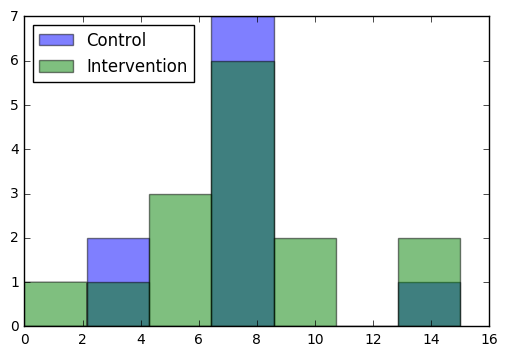

In [32]:
#comprehension         


tier2_control = main_cohort_c.apply(lambda row: returnScore(row,tier2),axis=1)
tier2_interve = main_cohort_i.apply(lambda row: returnScore(row,tier2),axis=1)

bins = numpy.linspace(0, 15, 8)

pyplot.hist(tier2_control, bins, alpha=0.5, label='Control')
pyplot.hist(tier2_interve, bins, alpha=0.5, label='Intervention')
pyplot.legend(loc='upper left')
pyplot.show()

In [33]:
print('Tier 2 Control Summary: ')
print(tier2_control.describe())
print('\n')
print('Tier 2 Intervention Summary: ')
print(tier2_interve.describe())

Tier 2 Control Summary: 
count    10.000000
mean      6.900000
std       2.601282
min       3.000000
25%       7.000000
50%       7.000000
75%       7.000000
max      13.000000
dtype: float64


Tier 2 Intervention Summary: 
count    15.000000
mean      7.600000
std       2.922817
min       2.000000
25%       6.000000
50%       7.000000
75%       8.500000
max      13.000000
dtype: float64


In [34]:
print("T Test results: ")
print(scipy.stats.ttest_ind(tier2_control,tier2_interve))

T Test results: 
Ttest_indResult(statistic=-0.61206702147817327, pvalue=0.54649716316466401)


<a id='teir3'></a>
### Teir 3 Questions

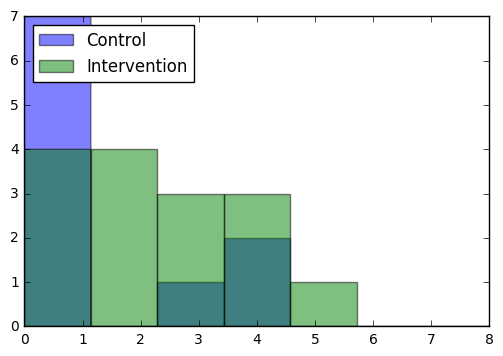

In [36]:

#projection
tier3 = ['11. After asking the patient about his gout, he explains that he has not picked up his gout medic...',
         '2. The patient’s blood pressure did not decrease in the 3 years after he was prescribed the thiaz...',
         '4. What do you suspect happened with his new antihypertensive regimen of HCTZ + ACE inhibitor tha...',
         '5. Despite Mr. Smith’s diligent adherence to his exercise and diet regimen and his past medicatio...',
         '5. Why do you think the provider chose bupropion to prescribe in 2006? '
         ]

tier3_control = main_cohort_c.apply(lambda row: returnScore(row,tier3),axis=1)
tier3_interve = main_cohort_i.apply(lambda row: returnScore(row,tier3),axis=1)

bins = numpy.linspace(0, 8, 8)

pyplot.hist(tier3_control, bins, alpha=0.5, label='Control')
pyplot.hist(tier3_interve, bins, alpha=0.5, label='Intervention')
pyplot.legend(loc='upper left')
pyplot.show()

In [37]:
print('Tier 3 Control Summary: ')
print(tier3_control.describe())
print('\n')
print('Tier 3 Intervention Summary: ')
print(tier3_interve.describe())

Tier 3 Control Summary: 
count    10.000000
mean      1.500000
std       1.581139
min       0.000000
25%       0.250000
50%       1.000000
75%       2.500000
max       4.000000
dtype: float64


Tier 3 Intervention Summary: 
count    15.000000
mean      2.466667
std       1.407463
min       0.000000
25%       1.500000
50%       2.000000
75%       3.500000
max       5.000000
dtype: float64


In [38]:
print("T Test results: ")
print(scipy.stats.ttest_ind(tier3_control,tier3_interve))

T Test results: 
Ttest_indResult(statistic=-1.6022131342835977, pvalue=0.12275484762401706)


<a id='time'></a>
### Time to complete

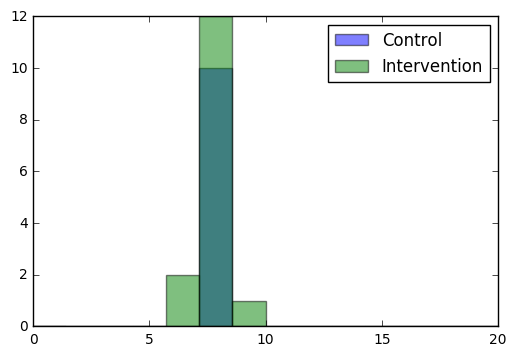

In [46]:
x = main_cohort_c['Q_TotalDuration']
x_min = x/60
#x_min_trunc = x_min[x_min<250]
y = main_cohort_i['Q_TotalDuration']
y_min = y/60
#y_min_trunc = y_min[y_min<250]

bins = numpy.linspace(0, 20, 15)

pyplot.hist(x_min, bins, alpha=0.5, label='Control')
pyplot.hist(y_min, bins, alpha=0.5, label='Intervention')
pyplot.legend(loc='upper right')
pyplot.show()

In [47]:
print('Total Time Duration Control Summary: ')
print(x_min.describe())
print('\n')
print('Total Time Duration Intervention Summary: ')
print(y_min.describe())

Total Time Duration Control Summary: 
count    10.000000
mean      7.980000
std       0.136716
min       7.600000
25%       8.000000
50%       8.008333
75%       8.041667
max       8.066667
Name: Q_TotalDuration, dtype: float64


Total Time Duration Intervention Summary: 
count    15.000000
mean      7.946667
std       0.561397
min       6.666667
25%       8.000000
50%       8.016667
75%       8.033333
max       9.300000
Name: Q_TotalDuration, dtype: float64


In [48]:
print("Student's t-test restuls: \n*************************************************")
print(scipy.stats.ttest_ind(x_min,y_min))

Student's t-test restuls: 
*************************************************
Ttest_indResult(statistic=0.18296128888991772, pvalue=0.85643161842280446)
